# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 18511 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 18511) |                   | Elapsed Time: 0:00:03 ETA:  20:21:47

  0% (   75 of 18511) |                    | Elapsed Time: 0:00:04 ETA:  0:04:08

  0% (  169 of 18511) |                    | Elapsed Time: 0:00:05 ETA:  0:03:36

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:06 ETA:  0:03:25

  1% (  353 of 18511) |                    | Elapsed Time: 0:00:07 ETA:  0:03:04

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:08 ETA:  0:02:57

  3% (  575 of 18511) |                    | Elapsed Time: 0:00:09 ETA:  0:02:52

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:10 ETA:  0:02:50

  4% (  806 of 18511) |                    | Elapsed Time: 0:00:11 ETA:  0:02:47

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:12 ETA:  0:02:35

  5% ( 1034 of 18511) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:33

  6% ( 1131 of 18511) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:38

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:39

  6% ( 1277 of 18511) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:36

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:34

  7% ( 1470 of 18511) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:40

  8% ( 1580 of 18511) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:40

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:39

  9% ( 1734 of 18511) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:36

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:33

 10% ( 1952 of 18511) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:38

 11% ( 2054 of 18511) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:39

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:39

 11% ( 2199 of 18511) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:29

 12% ( 2290 of 18511) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:33

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:36

 13% ( 2410 of 18511) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:40

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:33

 14% ( 2658 of 18511) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:29

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:23

 15% ( 2891 of 18511) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:23

 16% ( 2985 of 18511) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:21

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:18

 16% ( 3098 of 18511) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:23

 17% ( 3185 of 18511) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:31

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:28

 17% ( 3315 of 18511) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:38

 18% ( 3403 of 18511) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:46

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:46

 19% ( 3578 of 18511) |###                 | Elapsed Time: 0:00:39 ETA:  0:02:46

 19% ( 3677 of 18511) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:44

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:00:40 ETA:  0:02:44

 20% ( 3826 of 18511) |####                | Elapsed Time: 0:00:41 ETA:  0:02:29

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:00:42 ETA:  0:02:19

 21% ( 4045 of 18511) |####                | Elapsed Time: 0:00:43 ETA:  0:02:18

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:00:44 ETA:  0:02:04

 23% ( 4285 of 18511) |####                | Elapsed Time: 0:00:45 ETA:  0:01:58

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:00:46 ETA:  0:01:55

 24% ( 4479 of 18511) |####                | Elapsed Time: 0:00:47 ETA:  0:02:00

 24% ( 4579 of 18511) |####                | Elapsed Time: 0:00:48 ETA:  0:02:04

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:08

 25% ( 4734 of 18511) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:08

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:07

 26% ( 4962 of 18511) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:11

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:06

 28% ( 5199 of 18511) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:58

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:54

 29% ( 5423 of 18511) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:54

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:00:57 ETA:  0:01:52

 30% ( 5619 of 18511) |######              | Elapsed Time: 0:00:58 ETA:  0:02:00

 31% ( 5744 of 18511) |######              | Elapsed Time: 0:00:59 ETA:  0:01:57

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:00:59 ETA:  0:01:55

 31% ( 5908 of 18511) |######              | Elapsed Time: 0:01:00 ETA:  0:01:50

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:01:02 ETA:  0:01:53

 33% ( 6126 of 18511) |######              | Elapsed Time: 0:01:03 ETA:  0:01:50

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:01:04 ETA:  0:01:51

 34% ( 6353 of 18511) |######              | Elapsed Time: 0:01:05 ETA:  0:01:40

 34% ( 6453 of 18511) |######              | Elapsed Time: 0:01:06 ETA:  0:01:45

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:46

 35% ( 6599 of 18511) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:46

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:44

 36% ( 6828 of 18511) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:41

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:37

 38% ( 7058 of 18511) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:35

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:29

 39% ( 7299 of 18511) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:26

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:14 ETA:  0:01:25

 40% ( 7525 of 18511) |########            | Elapsed Time: 0:01:15 ETA:  0:01:20

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:01:16 ETA:  0:01:20

 41% ( 7758 of 18511) |########            | Elapsed Time: 0:01:17 ETA:  0:01:18

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:01:18 ETA:  0:01:20

 43% ( 7976 of 18511) |########            | Elapsed Time: 0:01:19 ETA:  0:01:19

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:01:20 ETA:  0:01:21

 44% ( 8209 of 18511) |########            | Elapsed Time: 0:01:21 ETA:  0:01:22

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:01:22 ETA:  0:01:23

 45% ( 8440 of 18511) |#########           | Elapsed Time: 0:01:23 ETA:  0:01:25

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:22

 46% ( 8672 of 18511) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:20

 47% ( 8738 of 18511) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:36

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:35

 48% ( 8913 of 18511) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:32

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:29

 49% ( 9133 of 18511) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:27

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:01:31 ETA:  0:01:26

 50% ( 9378 of 18511) |##########          | Elapsed Time: 0:01:32 ETA:  0:01:21

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:01:33 ETA:  0:01:08

 51% ( 9594 of 18511) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:08

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:01:35 ETA:  0:01:08

 53% ( 9837 of 18511) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:05

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:07

 54% (10067 of 18511) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:08

 55% (10182 of 18511) |###########         | Elapsed Time: 0:01:39 ETA:  0:01:04

 55% (10291 of 18511) |###########         | Elapsed Time: 0:01:40 ETA:  0:01:03

 56% (10413 of 18511) |###########         | Elapsed Time: 0:01:41 ETA:  0:01:04

 56% (10516 of 18511) |###########         | Elapsed Time: 0:01:42 ETA:  0:01:07

 57% (10611 of 18511) |###########         | Elapsed Time: 0:01:43 ETA:  0:01:09

 57% (10644 of 18511) |###########         | Elapsed Time: 0:01:44 ETA:  0:01:10

 58% (10763 of 18511) |###########         | Elapsed Time: 0:01:45 ETA:  0:01:08

 58% (10876 of 18511) |###########         | Elapsed Time: 0:01:45 ETA:  0:01:05

 59% (10993 of 18511) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:02

 60% (11107 of 18511) |############        | Elapsed Time: 0:01:48 ETA:  0:01:02

 60% (11210 of 18511) |############        | Elapsed Time: 0:01:49 ETA:  0:01:02

 61% (11338 of 18511) |############        | Elapsed Time: 0:01:50 ETA:  0:00:56

 61% (11454 of 18511) |############        | Elapsed Time: 0:01:51 ETA:  0:00:54

 62% (11570 of 18511) |############        | Elapsed Time: 0:01:52 ETA:  0:00:56

 63% (11674 of 18511) |############        | Elapsed Time: 0:01:53 ETA:  0:00:59

 63% (11778 of 18511) |############        | Elapsed Time: 0:01:54 ETA:  0:00:59

 63% (11801 of 18511) |############        | Elapsed Time: 0:01:54 ETA:  0:00:58

 64% (11907 of 18511) |############        | Elapsed Time: 0:01:55 ETA:  0:00:57

 65% (12033 of 18511) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:54

 65% (12143 of 18511) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:54

 66% (12251 of 18511) |#############       | Elapsed Time: 0:01:58 ETA:  0:00:53

 66% (12264 of 18511) |#############       | Elapsed Time: 0:01:58 ETA:  0:00:56

 66% (12390 of 18511) |#############       | Elapsed Time: 0:01:59 ETA:  0:00:49

 67% (12495 of 18511) |#############       | Elapsed Time: 0:02:00 ETA:  0:00:45

 67% (12574 of 18511) |#############       | Elapsed Time: 0:02:02 ETA:  0:01:00

 68% (12675 of 18511) |#############       | Elapsed Time: 0:02:03 ETA:  0:01:00

 68% (12727 of 18511) |#############       | Elapsed Time: 0:02:03 ETA:  0:01:02

 69% (12832 of 18511) |#############       | Elapsed Time: 0:02:04 ETA:  0:01:00

 70% (12958 of 18511) |##############      | Elapsed Time: 0:02:05 ETA:  0:01:02

 70% (13062 of 18511) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:58

 71% (13162 of 18511) |##############      | Elapsed Time: 0:02:07 ETA:  0:01:03

 71% (13190 of 18511) |##############      | Elapsed Time: 0:02:08 ETA:  0:01:07

 71% (13270 of 18511) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:56

 72% (13375 of 18511) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:54

 72% (13421 of 18511) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:52

 73% (13535 of 18511) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:48

 73% (13652 of 18511) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:46

 74% (13773 of 18511) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:41

 75% (13884 of 18511) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:38

 75% (13994 of 18511) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:36

 76% (14115 of 18511) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:27

 76% (14228 of 18511) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:26

 77% (14347 of 18511) |###############     | Elapsed Time: 0:02:18 ETA:  0:00:24

 78% (14461 of 18511) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:22

 78% (14578 of 18511) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:23

 79% (14690 of 18511) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:22

 80% (14809 of 18511) |################    | Elapsed Time: 0:02:22 ETA:  0:00:22

 80% (14903 of 18511) |################    | Elapsed Time: 0:02:23 ETA:  0:00:25

 81% (15041 of 18511) |################    | Elapsed Time: 0:02:25 ETA:  0:00:25

 81% (15155 of 18511) |################    | Elapsed Time: 0:02:26 ETA:  0:00:24

 82% (15272 of 18511) |################    | Elapsed Time: 0:02:27 ETA:  0:00:23

 83% (15376 of 18511) |################    | Elapsed Time: 0:02:28 ETA:  0:00:24

 83% (15503 of 18511) |################    | Elapsed Time: 0:02:29 ETA:  0:00:20

 84% (15615 of 18511) |################    | Elapsed Time: 0:02:30 ETA:  0:00:15

 85% (15735 of 18511) |#################   | Elapsed Time: 0:02:31 ETA:  0:00:16

 85% (15849 of 18511) |#################   | Elapsed Time: 0:02:32 ETA:  0:00:15

 86% (15966 of 18511) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:11

 86% (16081 of 18511) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:10

 87% (16198 of 18511) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:07

 88% (16302 of 18511) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:08

 88% (16394 of 18511) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:11

 88% (16429 of 18511) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:11

 89% (16546 of 18511) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:09

 90% (16660 of 18511) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:08

 90% (16741 of 18511) |##################  | Elapsed Time: 0:02:40 ETA:  0:00:16

 91% (16849 of 18511) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:16

 91% (16892 of 18511) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:18

 91% (17010 of 18511) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:13

 92% (17123 of 18511) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:08

 92% (17141 of 18511) |##################  | Elapsed Time: 0:02:45 ETA:  0:00:28

 93% (17242 of 18511) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:32

 93% (17355 of 18511) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:29

 94% (17462 of 18511) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:28

 94% (17558 of 18511) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:30

 95% (17586 of 18511) |################### | Elapsed Time: 0:02:49 ETA:  0:00:38

 95% (17698 of 18511) |################### | Elapsed Time: 0:02:50 ETA:  0:00:35

 96% (17817 of 18511) |################### | Elapsed Time: 0:02:51 ETA:  0:00:05

 96% (17916 of 18511) |################### | Elapsed Time: 0:02:52 ETA:  0:00:05

 97% (18049 of 18511) |################### | Elapsed Time: 0:02:53 ETA:  0:00:01

 98% (18147 of 18511) |################### | Elapsed Time: 0:02:54 ETA:  0:00:02

 98% (18280 of 18511) |################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 99% (18378 of 18511) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 99% (18477 of 18511) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:02:58 Time: 0:02:58


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

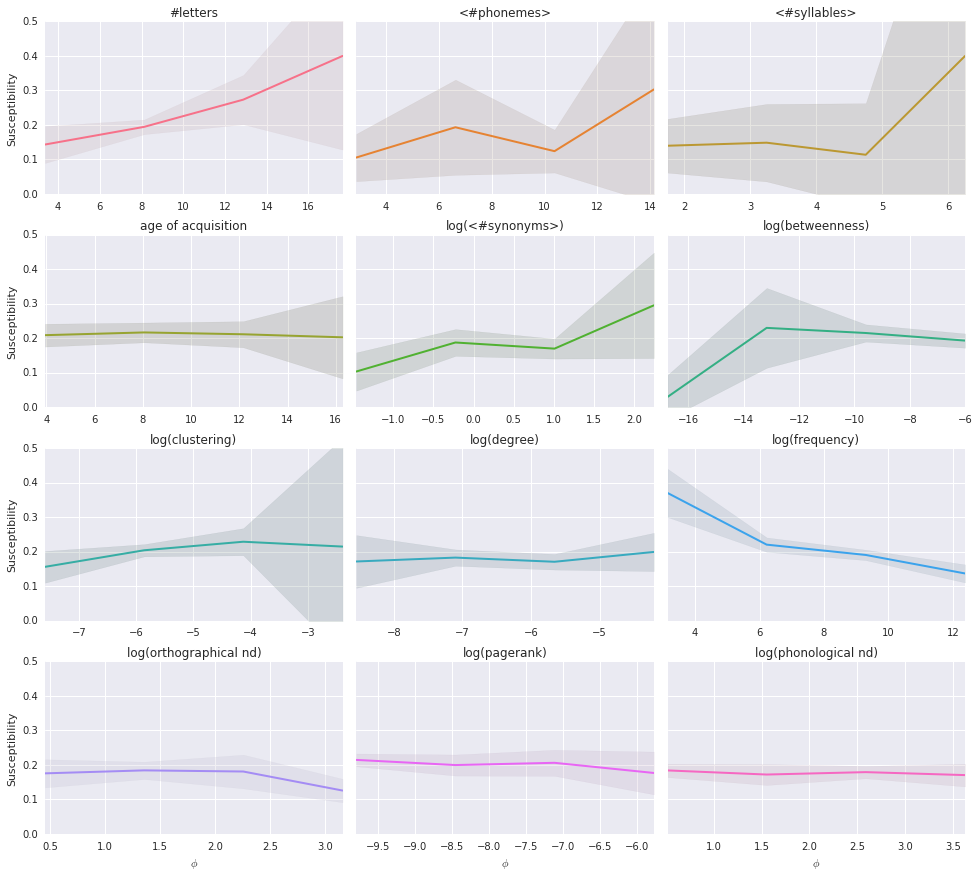

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

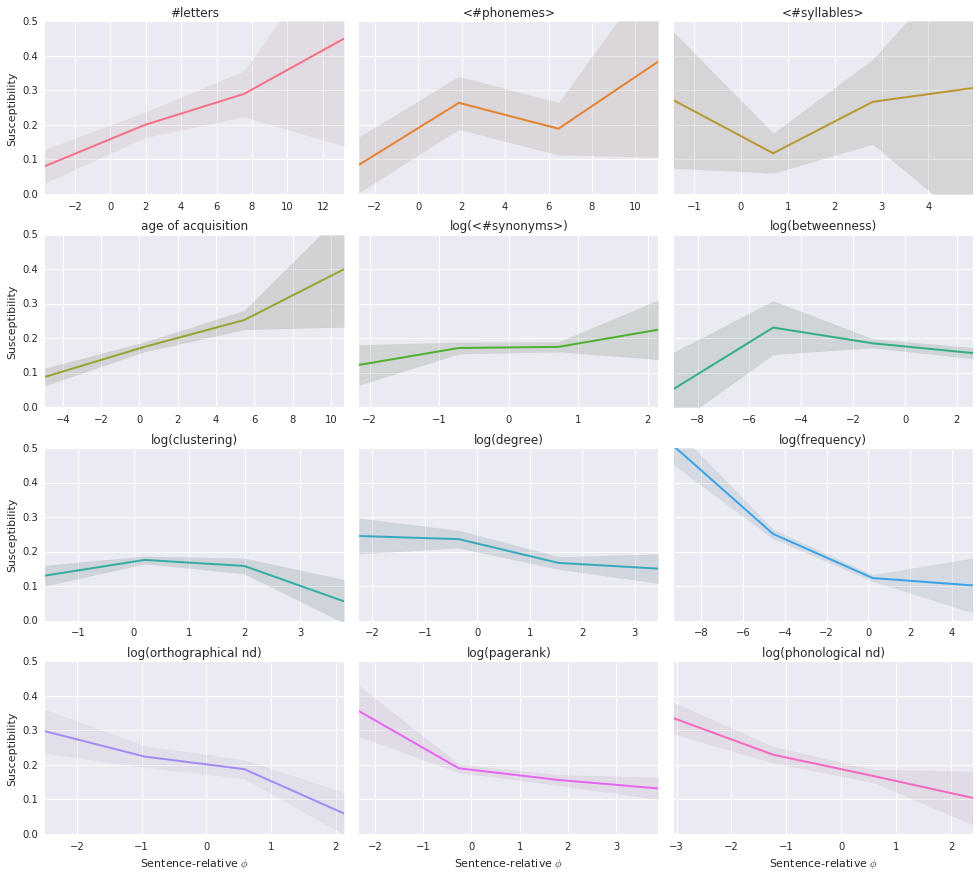

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

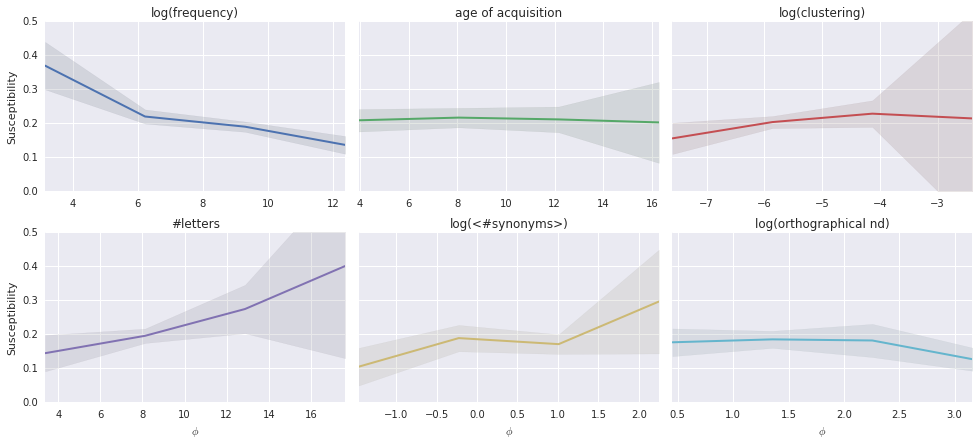

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

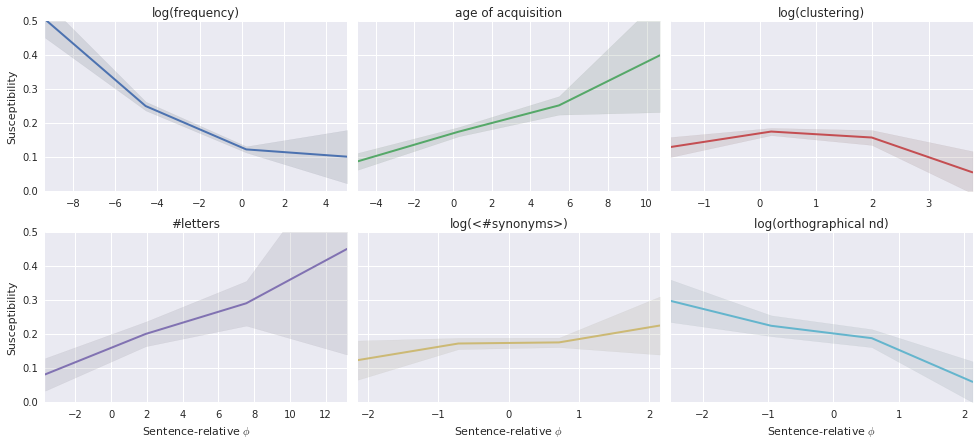

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

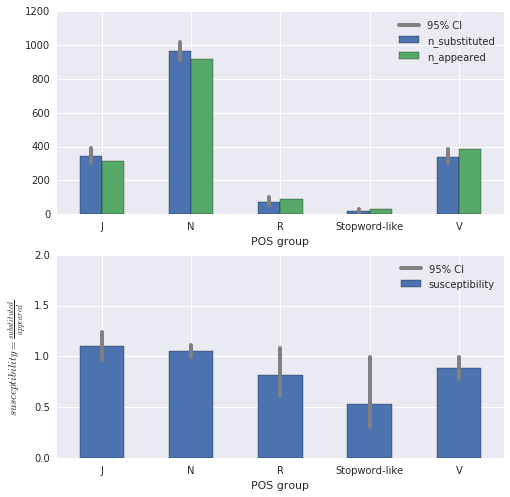

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['Stopword-like', 'V']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

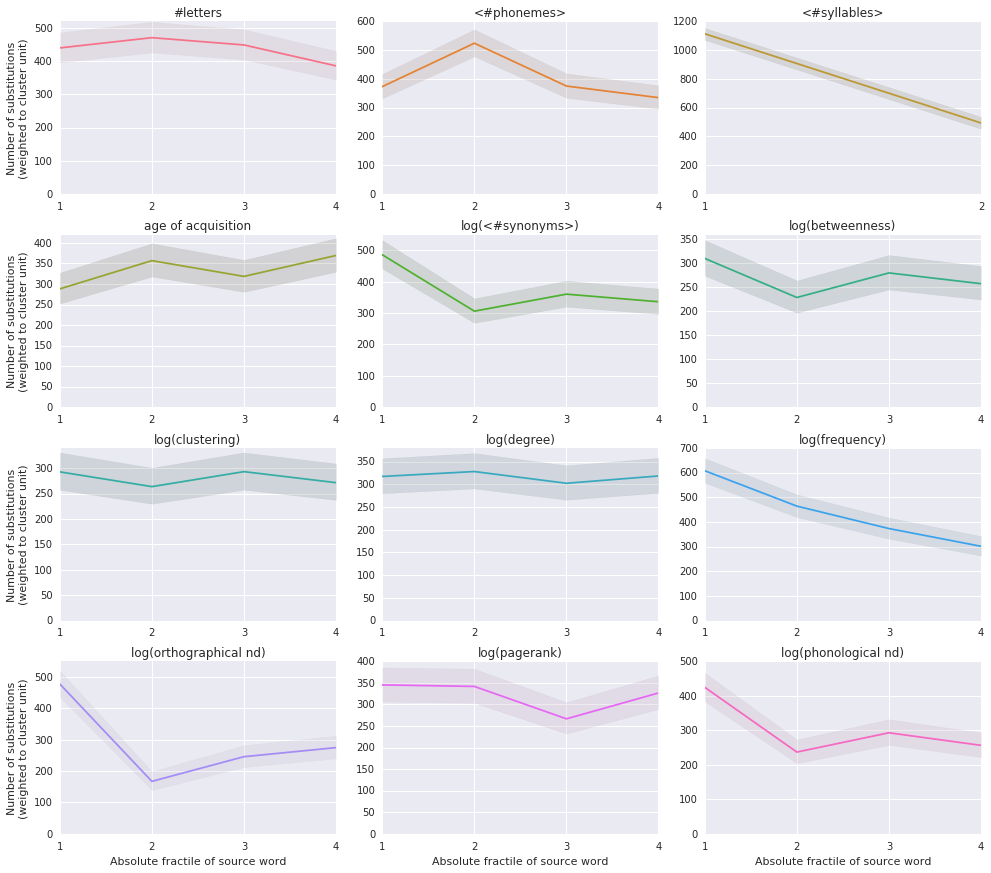

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

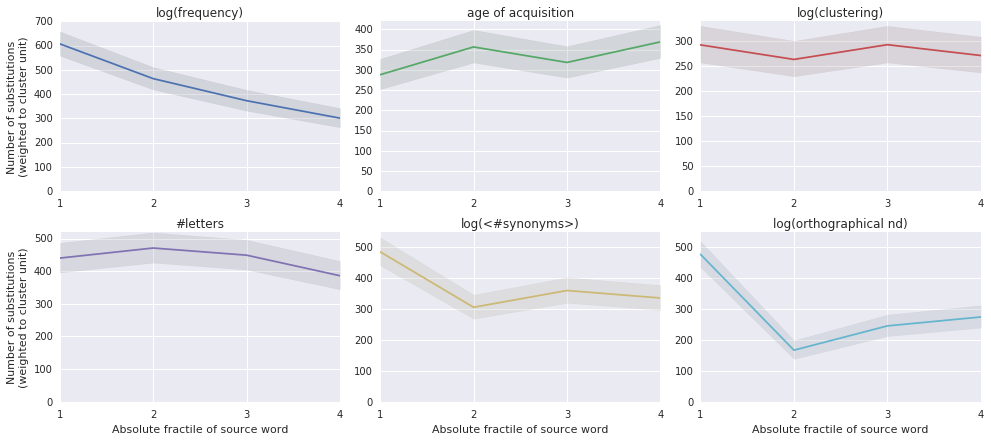

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   97 of 18511) |                    | Elapsed Time: 0:00:01 ETA:  0:03:10

  1% (  188 of 18511) |                    | Elapsed Time: 0:00:02 ETA:  0:03:22

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:02 ETA:  0:03:15

  1% (  311 of 18511) |                    | Elapsed Time: 0:00:03 ETA:  0:03:28

  2% (  409 of 18511) |                    | Elapsed Time: 0:00:04 ETA:  0:03:20

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:05 ETA:  0:03:17

  3% (  572 of 18511) |                    | Elapsed Time: 0:00:06 ETA:  0:03:09

  3% (  669 of 18511) |                    | Elapsed Time: 0:00:07 ETA:  0:03:07

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:07 ETA:  0:03:07

  4% (  771 of 18511) |                    | Elapsed Time: 0:00:08 ETA:  0:03:12

  4% (  847 of 18511) |                    | Elapsed Time: 0:00:09 ETA:  0:03:16

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:10 ETA:  0:03:18

  5% ( 1007 of 18511) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:22

  5% ( 1100 of 18511) |#                   | Elapsed Time: 0:00:12 ETA:  0:03:22

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:13 ETA:  0:03:30

  6% ( 1262 of 18511) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:26

  7% ( 1360 of 18511) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:21

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:16

  8% ( 1501 of 18511) |#                   | Elapsed Time: 0:00:16 ETA:  0:03:03

  8% ( 1580 of 18511) |#                   | Elapsed Time: 0:00:17 ETA:  0:03:01

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:17 ETA:  0:03:02

  9% ( 1718 of 18511) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:56

  9% ( 1812 of 18511) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:55

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:53

 10% ( 1953 of 18511) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:53

 11% ( 2051 of 18511) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:52

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:52

 11% ( 2179 of 18511) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:56

 12% ( 2280 of 18511) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:48

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:45

 13% ( 2407 of 18511) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:45

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:33

 14% ( 2642 of 18511) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:33

 14% ( 2745 of 18511) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:31

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:29

 15% ( 2869 of 18511) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:28

 16% ( 2980 of 18511) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:25

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:27

 16% ( 3103 of 18511) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:26

 17% ( 3184 of 18511) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:39

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:38

 17% ( 3316 of 18511) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:43

 18% ( 3405 of 18511) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:46

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:49

 19% ( 3553 of 18511) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:51

 19% ( 3635 of 18511) |###                 | Elapsed Time: 0:00:39 ETA:  0:02:59

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:00:39 ETA:  0:02:59

 20% ( 3797 of 18511) |####                | Elapsed Time: 0:00:40 ETA:  0:02:57

 21% ( 3891 of 18511) |####                | Elapsed Time: 0:00:41 ETA:  0:02:52

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:00:42 ETA:  0:02:54

 21% ( 4033 of 18511) |####                | Elapsed Time: 0:00:43 ETA:  0:02:46

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:00:44 ETA:  0:02:36

 23% ( 4288 of 18511) |####                | Elapsed Time: 0:00:45 ETA:  0:02:24

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:00:46 ETA:  0:02:14

 24% ( 4499 of 18511) |####                | Elapsed Time: 0:00:47 ETA:  0:02:11

 24% ( 4605 of 18511) |####                | Elapsed Time: 0:00:48 ETA:  0:02:08

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:00:48 ETA:  0:02:04

 25% ( 4720 of 18511) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:05

 26% ( 4820 of 18511) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:06

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:07

 26% ( 4966 of 18511) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:11

 27% ( 5073 of 18511) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:09

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:09

 28% ( 5198 of 18511) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:07

 28% ( 5301 of 18511) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:07

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:07

 29% ( 5416 of 18511) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:05

 29% ( 5505 of 18511) |#####               | Elapsed Time: 0:00:57 ETA:  0:02:07

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:00:58 ETA:  0:02:07

 30% ( 5555 of 18511) |######              | Elapsed Time: 0:00:59 ETA:  0:02:42

 30% ( 5636 of 18511) |######              | Elapsed Time: 0:01:00 ETA:  0:02:51

 31% ( 5748 of 18511) |######              | Elapsed Time: 0:01:01 ETA:  0:02:39

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:01:01 ETA:  0:02:47

 31% ( 5872 of 18511) |######              | Elapsed Time: 0:01:02 ETA:  0:02:53

 32% ( 5966 of 18511) |######              | Elapsed Time: 0:01:03 ETA:  0:02:48

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:01:04 ETA:  0:02:51

 33% ( 6118 of 18511) |######              | Elapsed Time: 0:01:05 ETA:  0:02:45

 33% ( 6223 of 18511) |######              | Elapsed Time: 0:01:06 ETA:  0:02:39

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:01:06 ETA:  0:02:09

 34% ( 6340 of 18511) |######              | Elapsed Time: 0:01:07 ETA:  0:02:05

 34% ( 6439 of 18511) |######              | Elapsed Time: 0:01:08 ETA:  0:02:08

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:01:09 ETA:  0:02:09

 35% ( 6560 of 18511) |#######             | Elapsed Time: 0:01:10 ETA:  0:02:09

 35% ( 6659 of 18511) |#######             | Elapsed Time: 0:01:11 ETA:  0:02:07

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:01:11 ETA:  0:02:02

 36% ( 6822 of 18511) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:58

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:54

 38% ( 7049 of 18511) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:49

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:42

 39% ( 7266 of 18511) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:38

 39% ( 7358 of 18511) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:39

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:18 ETA:  0:01:42

 40% ( 7520 of 18511) |########            | Elapsed Time: 0:01:19 ETA:  0:01:39

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:01:20 ETA:  0:01:42

 41% ( 7749 of 18511) |########            | Elapsed Time: 0:01:21 ETA:  0:01:39

 42% ( 7849 of 18511) |########            | Elapsed Time: 0:01:22 ETA:  0:01:39

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:01:23 ETA:  0:01:41

 43% ( 7970 of 18511) |########            | Elapsed Time: 0:01:24 ETA:  0:01:38

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:01:25 ETA:  0:01:27

 44% ( 8193 of 18511) |########            | Elapsed Time: 0:01:26 ETA:  0:01:31

 44% ( 8277 of 18511) |########            | Elapsed Time: 0:01:27 ETA:  0:01:33

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:33

 45% ( 8433 of 18511) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:34

 46% ( 8541 of 18511) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:31

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:30

 46% ( 8655 of 18511) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:31

 47% ( 8751 of 18511) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:39

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:36

 48% ( 8903 of 18511) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:31

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:19

 49% ( 9129 of 18511) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:19

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:17

 50% ( 9352 of 18511) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:18

 51% ( 9454 of 18511) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:15

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:13

 51% ( 9617 of 18511) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:09

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:08

 53% ( 9831 of 18511) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:10

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:06

 54% (10049 of 18511) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:08

 55% (10182 of 18511) |###########         | Elapsed Time: 0:01:44 ETA:  0:01:00

 55% (10275 of 18511) |###########         | Elapsed Time: 0:01:45 ETA:  0:01:01

 56% (10368 of 18511) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:03

 56% (10413 of 18511) |###########         | Elapsed Time: 0:01:47 ETA:  0:01:06

 56% (10511 of 18511) |###########         | Elapsed Time: 0:01:48 ETA:  0:01:07

 57% (10644 of 18511) |###########         | Elapsed Time: 0:01:49 ETA:  0:01:07

 58% (10747 of 18511) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:05

 58% (10876 of 18511) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:07

 59% (10994 of 18511) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:00

 60% (11107 of 18511) |############        | Elapsed Time: 0:01:53 ETA:  0:00:56

 60% (11220 of 18511) |############        | Elapsed Time: 0:01:54 ETA:  0:00:52

 61% (11338 of 18511) |############        | Elapsed Time: 0:01:55 ETA:  0:00:55

 61% (11431 of 18511) |############        | Elapsed Time: 0:01:56 ETA:  0:00:56

 62% (11570 of 18511) |############        | Elapsed Time: 0:01:57 ETA:  0:00:51

 63% (11680 of 18511) |############        | Elapsed Time: 0:01:58 ETA:  0:00:52

 63% (11801 of 18511) |############        | Elapsed Time: 0:01:59 ETA:  0:00:45

 64% (11934 of 18511) |############        | Elapsed Time: 0:02:00 ETA:  0:00:40

 65% (12033 of 18511) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:41

 65% (12134 of 18511) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:40

 66% (12233 of 18511) |#############       | Elapsed Time: 0:02:03 ETA:  0:00:42

 66% (12264 of 18511) |#############       | Elapsed Time: 0:02:03 ETA:  0:00:38

 66% (12369 of 18511) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:42

 67% (12495 of 18511) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:38

 68% (12603 of 18511) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:42

 68% (12701 of 18511) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:48

 68% (12727 of 18511) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:48

 69% (12849 of 18511) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:42

 70% (12958 of 18511) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:38

 70% (13057 of 18511) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:39

 71% (13165 of 18511) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:37

 71% (13190 of 18511) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:42

 71% (13271 of 18511) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:46

 72% (13376 of 18511) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:46

 72% (13421 of 18511) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:43

 73% (13530 of 18511) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:41

 73% (13652 of 18511) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:36

 74% (13744 of 18511) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:39

 74% (13845 of 18511) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:38

 75% (13884 of 18511) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:39

 75% (13995 of 18511) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:35

 75% (14029 of 18511) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:57

 76% (14115 of 18511) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:56

 76% (14217 of 18511) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:54

 77% (14347 of 18511) |###############     | Elapsed Time: 0:02:24 ETA:  0:01:03

 78% (14451 of 18511) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:59

 78% (14578 of 18511) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:56

 79% (14678 of 18511) |###############     | Elapsed Time: 0:02:27 ETA:  0:00:59

 80% (14809 of 18511) |################    | Elapsed Time: 0:02:29 ETA:  0:00:25

 80% (14920 of 18511) |################    | Elapsed Time: 0:02:30 ETA:  0:00:22

 81% (15041 of 18511) |################    | Elapsed Time: 0:02:31 ETA:  0:00:22

 81% (15130 of 18511) |################    | Elapsed Time: 0:02:32 ETA:  0:00:25

 82% (15242 of 18511) |################    | Elapsed Time: 0:02:33 ETA:  0:00:23

 82% (15272 of 18511) |################    | Elapsed Time: 0:02:33 ETA:  0:00:22

 83% (15371 of 18511) |################    | Elapsed Time: 0:02:34 ETA:  0:00:21

 83% (15503 of 18511) |################    | Elapsed Time: 0:02:35 ETA:  0:00:18

 84% (15607 of 18511) |################    | Elapsed Time: 0:02:36 ETA:  0:00:18

 84% (15714 of 18511) |################    | Elapsed Time: 0:02:37 ETA:  0:00:19

 85% (15735 of 18511) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:19

 85% (15847 of 18511) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:12

 86% (15966 of 18511) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:13

 86% (16085 of 18511) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:07

 87% (16198 of 18511) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:09

 88% (16314 of 18511) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:06

 88% (16429 of 18511) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:06

 89% (16539 of 18511) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:05

 90% (16660 of 18511) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:01

 90% (16781 of 18511) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 91% (17005 of 18511) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 93% (17227 of 18511) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 93% (17333 of 18511) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 94% (17469 of 18511) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 95% (17682 of 18511) |################### | Elapsed Time: 0:02:55 ETA:  0:00:01

 96% (17795 of 18511) |################### | Elapsed Time: 0:02:56 ETA:  0:00:01

 96% (17817 of 18511) |################### | Elapsed Time: 0:02:57 ETA:  0:00:04

 96% (17931 of 18511) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 98% (18154 of 18511) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 99% (18387 of 18511) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:03:03 Time: 0:03:03


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

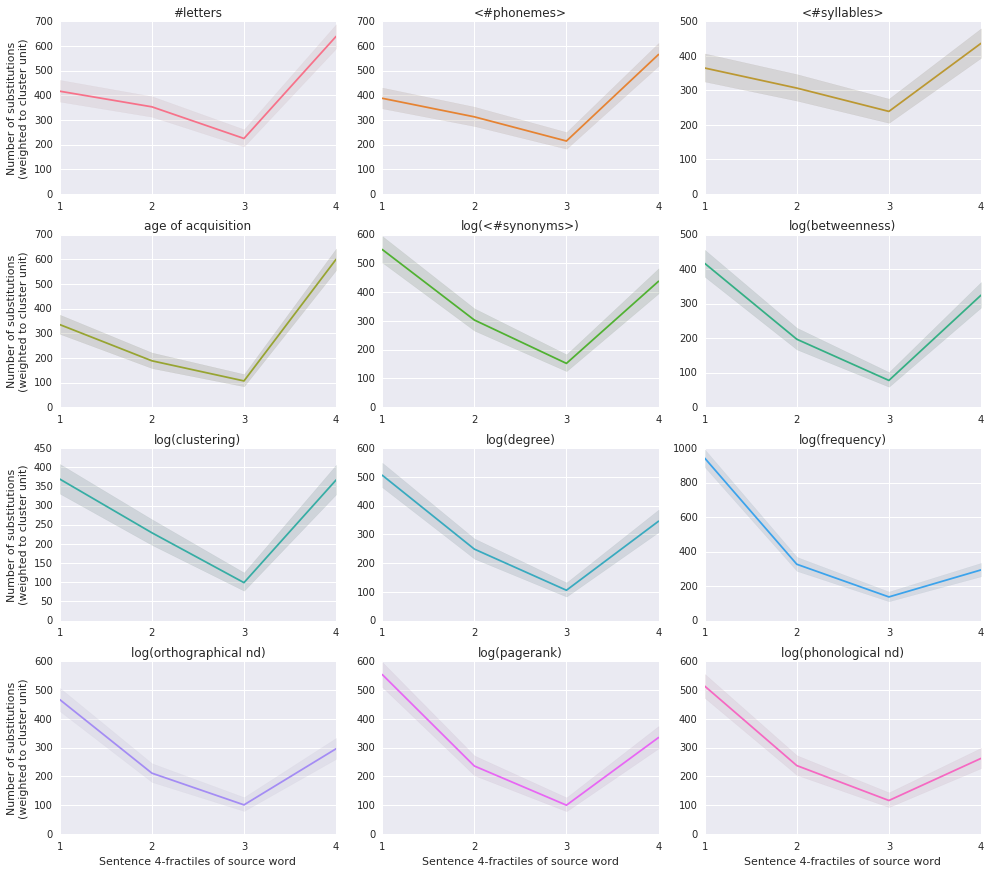

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

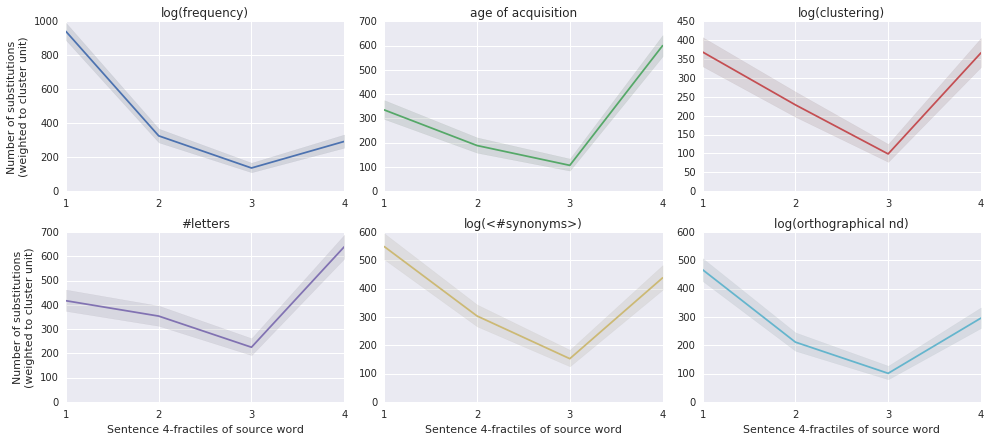

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)